In [103]:
from collections import Counter
import os
from glob import glob
import re

from graphviz import Source
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import networkx as nx
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter



sns.set_style('white')
sns.set_context('notebook')

def plot_style(figsize=(12, 6), labelsize=20, titlesize=24, ticklabelsize=14, **kwargs):
   basic_style = {
       'figure.figsize': figsize,
       'axes.labelsize': labelsize,
       'axes.titlesize': titlesize,
       'xtick.labelsize': ticklabelsize,
       'ytick.labelsize': ticklabelsize,
       'axes.spines.top': False,
       'axes.spines.right': False,
       'axes.spines.left': False,
       'axes.grid': False,
       'axes.grid.axis': 'y',
   }
   basic_style.update(kwargs)
   return plt.rc_context(rc=basic_style)

blue = sns.xkcd_rgb['ocean blue']

In [104]:
# fixa std path osv for tree5, change notebook name

## Create df with performance data

### Clone map

In [105]:
data = pd.read_csv('../../data/simulated_clone_key/simulated_clone_key_10clones.txt', sep = '\t')
#data = pd.read_csv('../../data/simulated_clone_key/simulated_clone_key_20clones.txt', sep = '\t')

data.head()

clones_map_raw = data.copy()

In [106]:
#clones_map_raw.head(20)

In [107]:
clones_map = dict(clones_map_raw[['tree_id', 'clone']].values)
all_clones = list(clones_map_raw.clone.unique())

In [108]:
n_samples_per_clone = clones_map_raw.clone.value_counts()
n_samples_per_clone

1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
Name: clone, dtype: int64

### Load tree and pmat data

In [109]:
#exp = 'tree1'

In [110]:
scite_input_path = f'../../../mt-SCITE/mt-SCITE_output/Simulations/non_informative_mutations/*/stdout/'

scite_stdout_filenames = list(glob(os.path.join(scite_input_path, '*.txt')))

# Get log likelihood scores and n trees
experiments = []
lhood = []
n_trees = []

for filename in sorted(scite_stdout_filenames, key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)]):
    name = os.path.basename(filename).split('-')[0].rsplit('.', 2)[0]
    #name = os.path.basename(filename).rsplit('.')[0].lsplit('_')[0]
    #print(name)
    experiments.append(name)
    file = open(filename, "r")
    for line in file:
        if 'best log score for tree:' in line:
            score = line.split('	')[1].rstrip()
            #print(score)
            lhood.append(score)
            lhood = [float(x) for x in lhood]
        if 'opt tree' in line:
            n = line.split(' opt')[0].lstrip()
            n_trees.append(n)
            n_trees = [int(x) for x in n_trees]
#print(len(experiments))
            

In [111]:
# non-informative positions and cells sharing non-informative positions            
n_ni_pos = []
n_cells_w_ni_pos = []

for i in experiments:
    i = i.split('_')
    #print(i)
    n_cells_w_ni_pos.append(i[1]) # cells sharing non-informative postions
    n_ni_pos.append(i[3]) # non-informative positions
#print(experiments)

In [112]:
#experiments

In [113]:
# Get n rows in pmat
pmat_input_path = f'../../data/simulations_matrix_output/non_informative/'

pmats = list(glob(os.path.join(pmat_input_path, '*.csv')))

n_pmat_rows = []
for filename in sorted(pmats, key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)]):
    #print(filename)
    file = open(filename, "r")
    n = len(file.readlines())
    n_pmat_rows.append(n)

### Create df

In [114]:
samples = 100

performance = pd.DataFrame(experiments)
performance['lhood'] = lhood
performance['lhood'] = performance['lhood'].astype(float)

performance['n trees'] = n_trees

performance['n_pmat_rows'] = n_pmat_rows # n rows in pmat

performance['entries'] = performance['n_pmat_rows']*samples

performance['lhood_entries'] = performance['lhood']/performance['entries']
performance = performance.rename(columns={0: 'error_rate'})
performance = performance.set_index('error_rate')
    
performance['n_ni_pos'] = n_ni_pos
performance['n_cells_w_ni_pos'] = n_cells_w_ni_pos

#performance['n_cells_w_ni_pos_frac'] = (performance['n_cells_w_ni_pos'].astype(int) / samples).round(2).astype(str)
#performance['n_ni_pos_frac'] = (performance['n_ni_pos'].astype(int) / performance['n_pmat_rows'].astype(int)).round(2)*100


# error rates refers to experiments with added non-informative positions
error_rates = performance.index.tolist()
n_trees = performance['n trees'].tolist()
#error_rates, n_trees


In [115]:
pd.set_option('display.max_rows', None)

### Read trees

In [120]:
scite_path = '../../../mt-SCITE/mt-SCITE_output/Simulations/non_informative_mutations/'

! mkdir $scite_path/all_dot_files
! mv $scite_path/1/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/2/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/3/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/4/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/5/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/6/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/7/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/8/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/9/*/*/*gv $scite_path/all_dot_files
! mv $scite_path/10/*/*/*gv $scite_path/all_dot_files

mkdir: ../../../mt-SCITE/mt-SCITE_output/Simulations/non_informative_mutations//all_dot_files: File exists
zsh:1: no matches found: ../../../mt-SCITE/mt-SCITE_output/Simulations/non_informative_mutations//1/*/*/*gv


In [121]:
#error_rates

In [122]:
MAX_TREES_PER_ERROR_RATE = 10
all_trees = {}
for error_rate, n in zip(error_rates, n_trees):
    all_trees[error_rate] = []
    for idx in range(min(MAX_TREES_PER_ERROR_RATE, n)):
        #print(n)
        tree_filename = f'../../../mt-SCITE/mt-SCITE_output/Simulations/non_informative_mutations/all_dot_files/{error_rate}_map{idx}.gv' 
        tree = nx.drawing.nx_pydot.read_dot(tree_filename)
        tree.remove_node('\\n')
        all_trees[error_rate].append(tree)
        #print(error_rate)

In [123]:
performance

lhood  n trees  n_pmat_rows  entries  \
error_rate                                                                
1_5_cells_10_pos_1_iter      -406.006019        1           40     4000   
1_5_cells_20_pos_1_iter      -809.378571       49           50     5000   
1_5_cells_30_pos_1_iter     -1227.522229        2           60     6000   
1_5_cells_40_pos_1_iter     -1508.309686        4           70     7000   
1_5_cells_50_pos_1_iter     -1937.399501        4           80     8000   
1_5_cells_60_pos_1_iter     -2436.598387       11           90     9000   
1_5_cells_70_pos_1_iter     -2758.407720        2          100    10000   
1_5_cells_80_pos_1_iter     -3172.788515        3          110    11000   
1_5_cells_90_pos_1_iter     -3513.136627        1          120    12000   
1_5_cells_100_pos_1_iter    -4019.992577        3          130    13000   
1_10_cells_10_pos_1_iter     -925.531952        8           40     4000   
1_10_cells_20_pos_1_iter    -1826.749867        4           50     5000   
1_10_cells_30_pos_1_iter    -2874.059064        1           60     6000   
1_10_cells_40_pos_1_iter    -3540.675358        6           70     7000   
1_10_cells_50_pos_1_iter    -4482.988354        3           80     8000   
1_10_cells_60_pos_1_iter    -5379.523348       27           90     9000   
1_10_cells_70_pos_1_iter    -6641.846819        2          100    10000   
1_10_cells_80_pos_1_iter    -7213.816400        3          110    11000   
1_10_cells_90_pos_1_iter    -8683.240071        9          120    12000   
1_10_cells_100_pos_1_iter   -9881.576382        3          130    13000   
1_20_cells_10_pos_1_iter    -2099.268207       16           40     4000   
1_20_cells_20_pos_1_iter    -4068.887193       30           50     5000   
1_20_cells_30_pos_1_iter    -6090.915105        8           60     6000   
1_20_cells_40_pos_1_iter    -7977.282851       11           70     7000   
1_20_cells_50_pos_1_iter   -10016.407564        7           80     8000   
1_20_cells_60_pos_1_iter   -12111.059218        8           90     9000   
1_20_cells_70_pos_1_iter   -13970.262991        2          100    10000   
1_20_cells_80_pos_1_iter   -16057.746434        1          110    11000   
1_20_cells_90_pos_1_iter   -18181.444095        5          120    12000   
1_20_cells_100_pos_1_iter  -20096.554368        1          130    13000   
1_30_cells_10_pos_1_iter    -3017.489407       16           40     4000   
1_30_cells_20_pos_1_iter    -5986.344997       30           50     5000   
1_30_cells_30_pos_1_iter    -8919.763186       35           60     6000   
1_30_cells_40_pos_1_iter   -11975.013055       94           70     7000   
1_30_cells_50_pos_1_iter   -15060.433087        7           80     8000   
1_30_cells_60_pos_1_iter   -18077.166259        1           90     9000   
1_30_cells_70_pos_1_iter   -21094.739821        3          100    10000   
1_30_cells_80_pos_1_iter   -23723.789716        1          110    11000   
1_30_cells_90_pos_1_iter   -27629.744496        5          120    12000   
1_30_cells_100_pos_1_iter  -30930.064543       15          130    13000   
2_5_cells_10_pos_1_iter      -385.667138       26           40     4000   
2_5_cells_20_pos_1_iter      -732.533601        1           50     5000   
2_5_cells_30_pos_1_iter     -1165.570010        2           60     6000   
2_5_cells_40_pos_1_iter     -1521.121071        7           70     7000   
2_5_cells_50_pos_1_iter     -1952.064231        4           80     8000   
2_5_cells_60_pos_1_iter     -2353.933638        1           90     9000   
2_5_cells_70_pos_1_iter     -2784.487291        6          100    10000   
2_5_cells_80_pos_1_iter     -3119.831067        1          110    11000   
2_5_cells_90_pos_1_iter     -3726.798367        1          120    12000   
2_5_cells_100_pos_1_iter    -4060.826097        2          130    13000   
2_10_cells_10_pos_1_iter     -844.527243      597           40     4000   
2_10_cells_20_pos_1_iter    -1765.443456       49           

In [124]:
def new_count_row(all_clone_names, clone_name=None):
    """ Create a DataFrame row with one entry per clone name. 
    
    If `clone_name` is not None, initialize that entry to 1.
    """
    row = pd.Series(data=0, index=all_clone_names)
    if clone_name is not None:
        row[clone_name] = 1
    return row

def dfs_clones_count(g, clones, all_clone_names, source_node):
    clones_count = pd.DataFrame({sample_name: new_count_row(all_clones, clone_name) for sample_name, clone_name in clones.items()})
    for pre_node, post_node, edge_label in nx.dfs_labeled_edges(g, source_node):
        if edge_label is not 'reverse' or pre_node == post_node: 
            continue
        pre_node_counter = clones_count.get(pre_node, new_count_row(all_clones))
        if post_node not in clones_count.columns:
            #print('!! possible mutation in a leaf: not found', post_node)
            continue
        clones_count[pre_node] = pre_node_counter + clones_count[post_node]

    return clones_count

def purity(clones_count):
    return clones_count.div(clones_count.sum(axis=0), axis=1)

def get_root_node(t):
    root_nodes = [n for n,d in t.in_degree() if d==0]
    assert len(root_nodes) == 1
    root_node = root_nodes[0]
    return root_node

<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if edge_label is not 'reverse' or pre_node == post_node:


# Avg purity of nodes with >1 sample

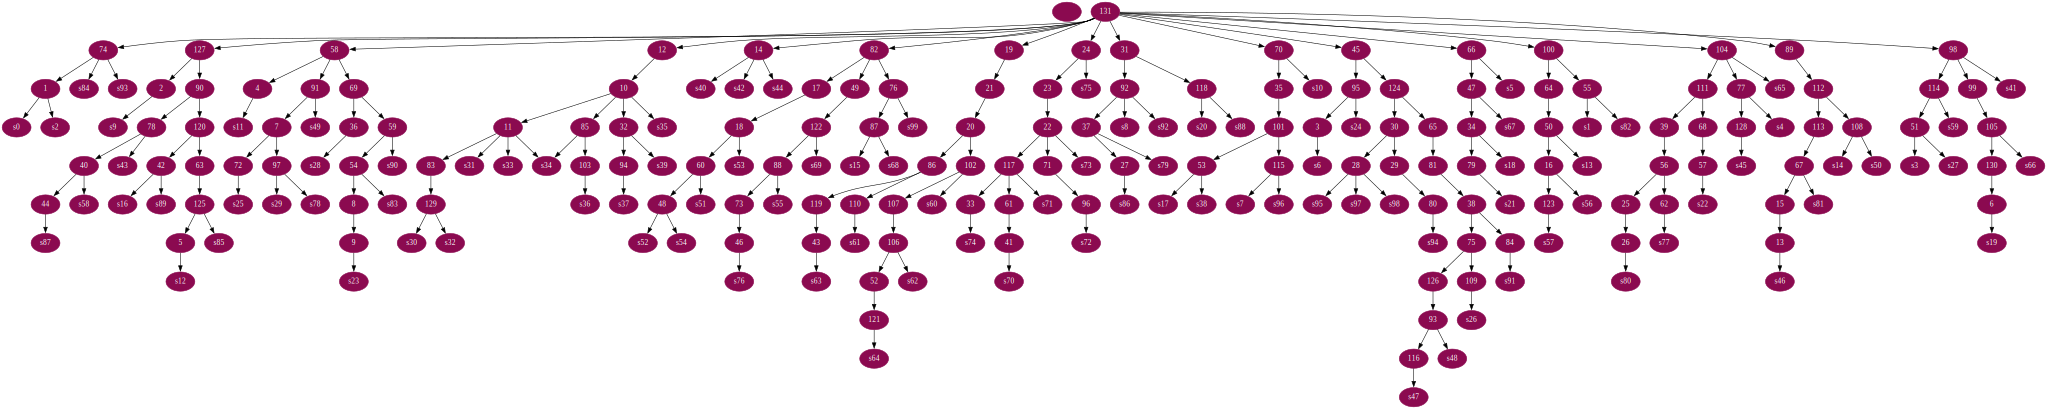

In [126]:

tree_filename = f'../../../mt-SCITE/mt-SCITE_output/Simulations/non_informative_mutations/all_dot_files/10_10_cells_100_pos_1_iter_map0.gv'

#tree_filename = f'../../data/simulations_matrix_output/ground_truth/1.csv'

tree = nx.drawing.nx_pydot.read_dot(tree_filename)

from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
g = to_agraph(tree)
g.layout('dot')
#g.draw(f'figs/trees/{error_rate}_map{tree_number}.pdf')
Source(g)

In [127]:
performance['avg_purity_more_than_one_sample'] = 0
performance['frac_purity_100_more_than_one_sample'] = 0
for error_rate, trees in all_trees.items():
    avg_purities = []
    frac_purities_100 = []
    n_purities_100 = []
    for t in trees:
        clones_count = dfs_clones_count(t, clones_map, all_clones, source_node=get_root_node(t))
        #print(clones_count)
        
        # which nodes have more than one sample
        more_than_one_sample = clones_count.sum(axis=0) > 1
        p = purity(clones_count).loc[:, more_than_one_sample]
        #print(p)

        # Drop root node since it is attached to all samples
        # Get the root node
        root_node = str(get_root_node(t))
        #print(root_node)
        # Get the index of the root node
        root_idx = list(p.columns).index(root_node)
        #print(root_idx)
        # drop the root node 
        p = p.drop(p.columns[[root_idx]],axis = 1)
        #print(p)

        
        # Average purity
        avg_purity = p.max(axis=0).mean()
        #print(p.max)
        avg_purities.append(avg_purity)

        # Fraction of nodes with 100% purity
        is_purity_100 = np.isclose(p.max(axis=0), 1.0)
        frac_purity_100 = is_purity_100.sum() / is_purity_100.shape[0]
        frac_purities_100.append(frac_purity_100)
        
    performance.loc[error_rate, 'avg_purity_more_than_one_sample'] = avg_purities[0]
    performance.loc[error_rate, 'frac_purity_100_more_than_one_sample'] = frac_purities_100[0]

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

In [128]:
performance

lhood  n trees  n_pmat_rows  entries  \
error_rate                                                                
1_5_cells_10_pos_1_iter      -406.006019        1           40     4000   
1_5_cells_20_pos_1_iter      -809.378571       49           50     5000   
1_5_cells_30_pos_1_iter     -1227.522229        2           60     6000   
1_5_cells_40_pos_1_iter     -1508.309686        4           70     7000   
1_5_cells_50_pos_1_iter     -1937.399501        4           80     8000   
1_5_cells_60_pos_1_iter     -2436.598387       11           90     9000   
1_5_cells_70_pos_1_iter     -2758.407720        2          100    10000   
1_5_cells_80_pos_1_iter     -3172.788515        3          110    11000   
1_5_cells_90_pos_1_iter     -3513.136627        1          120    12000   
1_5_cells_100_pos_1_iter    -4019.992577        3          130    13000   
1_10_cells_10_pos_1_iter     -925.531952        8           40     4000   
1_10_cells_20_pos_1_iter    -1826.749867        4           50     5000   
1_10_cells_30_pos_1_iter    -2874.059064        1           60     6000   
1_10_cells_40_pos_1_iter    -3540.675358        6           70     7000   
1_10_cells_50_pos_1_iter    -4482.988354        3           80     8000   
1_10_cells_60_pos_1_iter    -5379.523348       27           90     9000   
1_10_cells_70_pos_1_iter    -6641.846819        2          100    10000   
1_10_cells_80_pos_1_iter    -7213.816400        3          110    11000   
1_10_cells_90_pos_1_iter    -8683.240071        9          120    12000   
1_10_cells_100_pos_1_iter   -9881.576382        3          130    13000   
1_20_cells_10_pos_1_iter    -2099.268207       16           40     4000   
1_20_cells_20_pos_1_iter    -4068.887193       30           50     5000   
1_20_cells_30_pos_1_iter    -6090.915105        8           60     6000   
1_20_cells_40_pos_1_iter    -7977.282851       11           70     7000   
1_20_cells_50_pos_1_iter   -10016.407564        7           80     8000   
1_20_cells_60_pos_1_iter   -12111.059218        8           90     9000   
1_20_cells_70_pos_1_iter   -13970.262991        2          100    10000   
1_20_cells_80_pos_1_iter   -16057.746434        1          110    11000   
1_20_cells_90_pos_1_iter   -18181.444095        5          120    12000   
1_20_cells_100_pos_1_iter  -20096.554368        1          130    13000   
1_30_cells_10_pos_1_iter    -3017.489407       16           40     4000   
1_30_cells_20_pos_1_iter    -5986.344997       30           50     5000   
1_30_cells_30_pos_1_iter    -8919.763186       35           60     6000   
1_30_cells_40_pos_1_iter   -11975.013055       94           70     7000   
1_30_cells_50_pos_1_iter   -15060.433087        7           80     8000   
1_30_cells_60_pos_1_iter   -18077.166259        1           90     9000   
1_30_cells_70_pos_1_iter   -21094.739821        3          100    10000   
1_30_cells_80_pos_1_iter   -23723.789716        1          110    11000   
1_30_cells_90_pos_1_iter   -27629.744496        5          120    12000   
1_30_cells_100_pos_1_iter  -30930.064543       15          130    13000   
2_5_cells_10_pos_1_iter      -385.667138       26           40     4000   
2_5_cells_20_pos_1_iter      -732.533601        1           50     5000   
2_5_cells_30_pos_1_iter     -1165.570010        2           60     6000   
2_5_cells_40_pos_1_iter     -1521.121071        7           70     7000   
2_5_cells_50_pos_1_iter     -1952.064231        4           80     8000   
2_5_cells_60_pos_1_iter     -2353.933638        1           90     9000   
2_5_cells_70_pos_1_iter     -2784.487291        6          100    10000   
2_5_cells_80_pos_1_iter     -3119.831067        1          110    11000   
2_5_cells_90_pos_1_iter     -3726.798367        1          120    12000   
2_5_cells_100_pos_1_iter    -4060.826097        2          130    13000   
2_10_cells_10_pos_1_iter     -844.527243      597           40     4000   
2_10_cells_20_pos_1_iter    -1765.443456       49           

# Clone coverage at full purity

In [129]:
performance['min_clone_coverage'] = np.nan
performance['avg_clone_coverage'] = np.nan
for error_rate, trees in all_trees.items():
    t = trees[0]
    clones_count = dfs_clones_count(t, clones_map, all_clones, source_node=get_root_node(t))
    p = purity(clones_count)
    is_pure = p.max(axis=0) == 1.0
    coverage_per_clone = clones_count.loc[:, is_pure].div(n_samples_per_clone, axis=0).max(axis=1)
    min_coverage = coverage_per_clone.min()
    
    # drop clones w/o clone mut
    #avg_coverage = coverage_per_clone.drop([1, 2, 4, 6, 9], axis=0).mean()
    
    avg_coverage = coverage_per_clone.mean()
        
    performance.loc[error_rate, 'min_clone_coverage'] = min_coverage
    performance.loc[error_rate, 'avg_clone_coverage'] = avg_coverage

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  clones_count[pre_node] = pre_node_counter + clones_count[post_node]
/var/folders/vw/hdz80fyj66q3q6n5fkgfmvf80000gs/T/ipykernel_57565/3265254245.py:20: PerformanceWarning: DataFrame is highly fragmented.  This

In [130]:
performance

lhood  n trees  n_pmat_rows  entries  \
error_rate                                                                
1_5_cells_10_pos_1_iter      -406.006019        1           40     4000   
1_5_cells_20_pos_1_iter      -809.378571       49           50     5000   
1_5_cells_30_pos_1_iter     -1227.522229        2           60     6000   
1_5_cells_40_pos_1_iter     -1508.309686        4           70     7000   
1_5_cells_50_pos_1_iter     -1937.399501        4           80     8000   
1_5_cells_60_pos_1_iter     -2436.598387       11           90     9000   
1_5_cells_70_pos_1_iter     -2758.407720        2          100    10000   
1_5_cells_80_pos_1_iter     -3172.788515        3          110    11000   
1_5_cells_90_pos_1_iter     -3513.136627        1          120    12000   
1_5_cells_100_pos_1_iter    -4019.992577        3          130    13000   
1_10_cells_10_pos_1_iter     -925.531952        8           40     4000   
1_10_cells_20_pos_1_iter    -1826.749867        4           50     5000   
1_10_cells_30_pos_1_iter    -2874.059064        1           60     6000   
1_10_cells_40_pos_1_iter    -3540.675358        6           70     7000   
1_10_cells_50_pos_1_iter    -4482.988354        3           80     8000   
1_10_cells_60_pos_1_iter    -5379.523348       27           90     9000   
1_10_cells_70_pos_1_iter    -6641.846819        2          100    10000   
1_10_cells_80_pos_1_iter    -7213.816400        3          110    11000   
1_10_cells_90_pos_1_iter    -8683.240071        9          120    12000   
1_10_cells_100_pos_1_iter   -9881.576382        3          130    13000   
1_20_cells_10_pos_1_iter    -2099.268207       16           40     4000   
1_20_cells_20_pos_1_iter    -4068.887193       30           50     5000   
1_20_cells_30_pos_1_iter    -6090.915105        8           60     6000   
1_20_cells_40_pos_1_iter    -7977.282851       11           70     7000   
1_20_cells_50_pos_1_iter   -10016.407564        7           80     8000   
1_20_cells_60_pos_1_iter   -12111.059218        8           90     9000   
1_20_cells_70_pos_1_iter   -13970.262991        2          100    10000   
1_20_cells_80_pos_1_iter   -16057.746434        1          110    11000   
1_20_cells_90_pos_1_iter   -18181.444095        5          120    12000   
1_20_cells_100_pos_1_iter  -20096.554368        1          130    13000   
1_30_cells_10_pos_1_iter    -3017.489407       16           40     4000   
1_30_cells_20_pos_1_iter    -5986.344997       30           50     5000   
1_30_cells_30_pos_1_iter    -8919.763186       35           60     6000   
1_30_cells_40_pos_1_iter   -11975.013055       94           70     7000   
1_30_cells_50_pos_1_iter   -15060.433087        7           80     8000   
1_30_cells_60_pos_1_iter   -18077.166259        1           90     9000   
1_30_cells_70_pos_1_iter   -21094.739821        3          100    10000   
1_30_cells_80_pos_1_iter   -23723.789716        1          110    11000   
1_30_cells_90_pos_1_iter   -27629.744496        5          120    12000   
1_30_cells_100_pos_1_iter  -30930.064543       15          130    13000   
2_5_cells_10_pos_1_iter      -385.667138       26           40     4000   
2_5_cells_20_pos_1_iter      -732.533601        1           50     5000   
2_5_cells_30_pos_1_iter     -1165.570010        2           60     6000   
2_5_cells_40_pos_1_iter     -1521.121071        7           70     7000   
2_5_cells_50_pos_1_iter     -1952.064231        4           80     8000   
2_5_cells_60_pos_1_iter     -2353.933638        1           90     9000   
2_5_cells_70_pos_1_iter     -2784.487291        6          100    10000   
2_5_cells_80_pos_1_iter     -3119.831067        1          110    11000   
2_5_cells_90_pos_1_iter     -3726.798367        1          120    12000   
2_5_cells_100_pos_1_iter    -4060.826097        2          130    13000   
2_10_cells_10_pos_1_iter     -844.527243      597           40     4000   
2_10_cells_20_pos_1_iter    -1765.443456       49           

# Plots

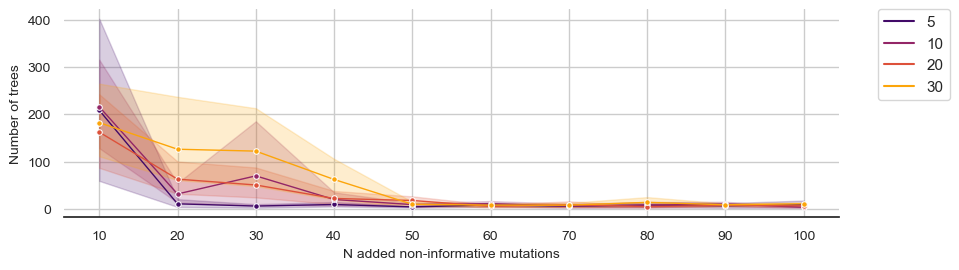

In [132]:
with plot_style(figsize=(10, 2.7), ticklabelsize=10, labelsize=10):
    sns.lineplot(data=performance, x="n_ni_pos", y="n trees", hue = 'n_cells_w_ni_pos', palette='inferno', marker='o', markersize=4, lw=1)
    plt.grid(axis='both')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Number of trees')
    plt.xlabel('N added non-informative mutations')

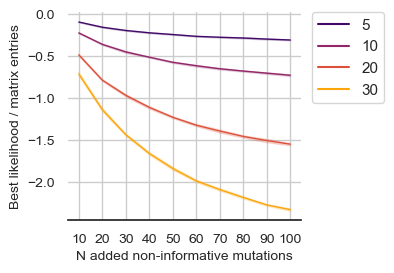

In [133]:
with plot_style(figsize=(3, 2.7), ticklabelsize=10, labelsize=10):
    sns.lineplot(data=performance, x="n_ni_pos", y="lhood_entries", hue = 'n_cells_w_ni_pos', palette='inferno', markersize=4, lw=1) #marker='o'
    plt.grid(axis='both')
    #ax.set_xlim(0, 20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Best likelihood / matrix entries')
    plt.xlabel('N added non-informative mutations')
    
#plt.savefig(f'../../data/simulated_figures/lhood_{exp}.svg', dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig(f'../../data/simulated_figures/lhood_{exp}.jpg', dpi=300, bbox_inches='tight', transparent=True)

## Average purity

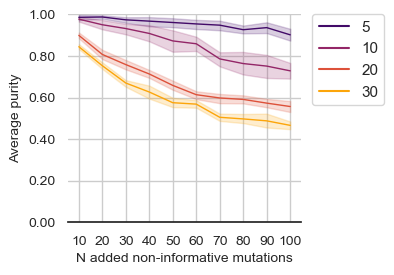

In [134]:
with plot_style(figsize=(3, 2.7), ticklabelsize=10, labelsize=10):
    ax = sns.lineplot(data=performance, x="n_ni_pos", y="avg_purity_more_than_one_sample", hue = 'n_cells_w_ni_pos', palette='inferno', markersize=4, lw=1)
    ax.set_ylim(0, 1)
    plt.grid(axis='both')
    #plt.xlim(0, 15)
    #ax.set_xlim(0, 20)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #tick = 1
    #[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % tick != 0]
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Average purity')
    plt.xlabel('N added non-informative mutations')
    
    
#plt.savefig(f'../../data/simulated_figures/tree6_clevel_2_avg_purity_{exp}.svg', dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig(f'../../data/simulated_figures/tree6_clevel_2_avg_purity_{exp}.jpg', dpi=300, bbox_inches='tight', transparent=True)

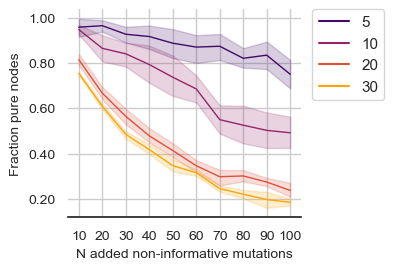

In [135]:
with plot_style(figsize=(3, 2.7), ticklabelsize=10, labelsize=10):
    ax = sns.lineplot(data=performance, x="n_ni_pos", y="frac_purity_100_more_than_one_sample", hue = 'n_cells_w_ni_pos', palette='inferno', markersize=4, lw=1)
    #ax.set_ylim(0, 1)
    plt.grid(axis='both')
    #plt.xlim(0, 15)
    #ax.set_xlim(0, 20)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #tick = 1
    #[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % tick != 0]
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Fraction pure nodes')
    plt.xlabel('N added non-informative mutations')
    
#plt.savefig(f'../../data/simulated_figures/fraction_pure_nodes_{exp}.svg', dpi=300, bbox_inches='tight', transparent=True)
#plt.savefig(f'../../data/simulated_figures/fraction_pure_nodes_{exp}.jpg', dpi=300, bbox_inches='tight', transparent=True)

In [101]:
# plot antal 100% pure 75, 50, 25, 10. Antal celler attached to these

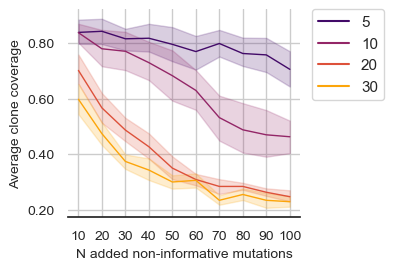

In [137]:
with plot_style(figsize=(3, 2.7), ticklabelsize=10, labelsize=10):
    ax = sns.lineplot(data=performance, x="n_ni_pos", y="avg_clone_coverage", hue = 'n_cells_w_ni_pos', palette='inferno', markersize=4, lw=1)
    #ax.set_ylim(0, 1)
    plt.grid(axis='both')
    #plt.xlim(0, 15)
    #ax.set_xlim(0, 20)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #tick = 1
    #[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % tick != 0]
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Average clone coverage')
    plt.xlabel('N added non-informative mutations')